In [1]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
# import functions from modsim

from modsim import *

The following cell downloads the data.

In [3]:
download('https://github.com/AllenDowney/ModSim/raw/main/data/' +
         'glucose_insulin.csv')

'https://github.com/AllenDowney/ModSim/raw/main/data/glucose_insulin.csv'

Downloaded glucose_insulin.csv


'https://github.com/AllenDowney/ModSim/raw/main/data/glucose_insulin.csv'

In [4]:
from pandas import read_csv

data = read_csv('glucose_insulin.csv', index_col='time')

In [5]:
data.head()

,glucose,insulin
time,,
0,92,11
2,350,26
4,287,130
6,251,85
8,240,51


In [6]:
I = interpolate(data.insulin)

In [7]:
I(18)

array(31.66666667)

In [8]:
t_0 = data.index[0]
t_end = data.index[-1]
t_array = linrange(t_0, t_end)

In [9]:
I_array = I(t_array)

In [10]:
I_series = make_series(t_array, I_array)

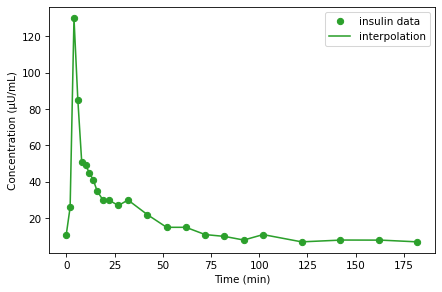

In [11]:
data.insulin.plot(style='o', color='C2', label='insulin data')
I_series.plot(color='C2', label='interpolation')

decorate(xlabel='Time (min)',
         ylabel='Concentration (μU/mL)')

### Exercise 1



In [12]:
I = interpolate(data.insulin, kind='cubic')
I_array = I(t_array)
I_series = make_series(t_array, I_array)

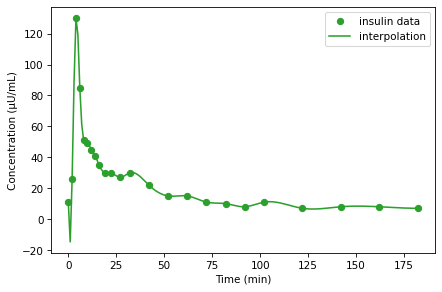

In [13]:
# Here's the plotting code again.

data.insulin.plot(style='o', color='C2', label='insulin data')
I_series.plot(color='C2', label='interpolation')

decorate(xlabel='Time (min)',
         ylabel='Concentration (μU/mL)')

In [14]:
# Cubic interpolation is smoother, which might be appropriate for data
# like this, which we expect to vary smoothly over time.
# But notice that it can extend beyond the range of the data; in this
# example, some of the interpolated values are negative, which is not
# meaningful because a concentration cannot be negative.
# So in this case, it's probably best to keep it simple and use linear
# interpolation.

### Exercise 2


In [15]:
G = interpolate(data.glucose)
G_array = G(t_array)
G_series = make_series(t_array, G_array)

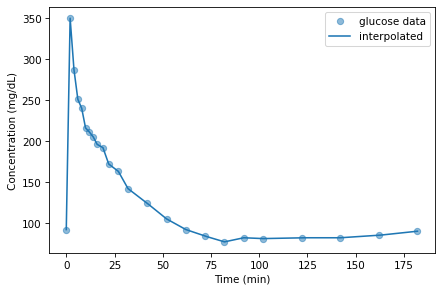

In [16]:
data.glucose.plot(style='o', alpha=0.5, label='glucose data')
G_series.plot(color='C0', label='interpolated')

decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/dL)')